# Sequential API

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [ ]:
model=Sequential()
model.add(Dense(units=64,input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Functional API

In [ ]:
from keras.layers import Input,Dense,concatenate
from keras.models import Model

In [ ]:
input1=Input(shape=(100,))
input2=Input(shape=(50,))
hidden1=Dense(64,activation='relu')(input1)
hidden2=Dense(32,activation='relu')(input2)
merged=concatenate([hidden1,hidden2])
output=Dense(10,activation='softmax')(merged)
model=Model(inputs=[input1,input2],outputs=output)

# Program KERAS-Deep

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

splitting the dataset

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train,X_test=X_train/255.0,X_test/255.0

Converting into tensor arrays

In [ ]:
X_train=X_train[...,tf.newaxis]
X_test=X_test[...,tf.newaxis]

In [ ]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8995 - loss: 0.3262 - val_accuracy: 0.9812 - val_loss: 0.0568
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9839 - loss: 0.0536 - val_accuracy: 0.9876 - val_loss: 0.0355
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9862 - val_loss: 0.0414
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9899 - val_loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9949 - loss: 0.0174 - val_accuracy: 0.9913 - val_loss: 0.0295


In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"\n Testaccuracy:{test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9892 - loss: 0.0398

 Testaccuracy:0.99


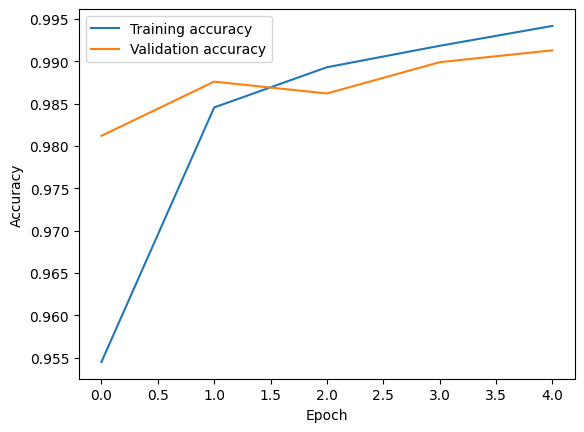

In [ ]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()